In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############ loading train and test datasets ##############
df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



In [2]:
train_data.isna().sum()[train_data.isna().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [3]:
# Temporal Variables/ Datetime Variables
Yr_features = [features for features in train_data.columns if 'Yr' in features or 'Year' in features]
print('number of Temporal Variables:', len(Yr_features))
train_data[Yr_features].head()

number of Temporal Variables: 4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [6]:
############### Numerical Features ################################
numerical_features = [ f for f in train_data.columns if train_data[f].dtypes != 'O']

In [8]:
len(numerical_features)

38

In [9]:
############### Categorical Features ################################
categorical_features = [ f for f in train_data.columns if train_data[f].dtypes == 'O']

In [10]:
len(categorical_features)

43

In [11]:
train_data.shape

(1460, 81)

In [12]:
43+38

81

In [13]:
############### NOTE: 43 categorical and 38 Numerical Features ##################

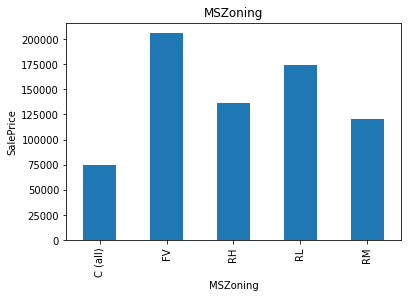

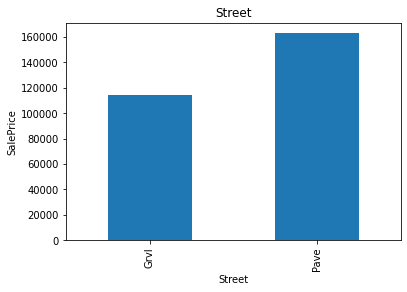

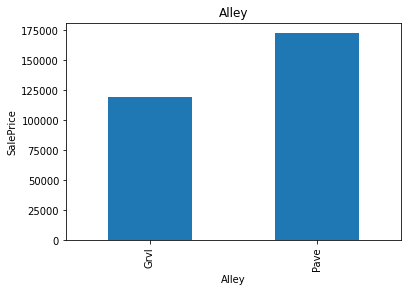

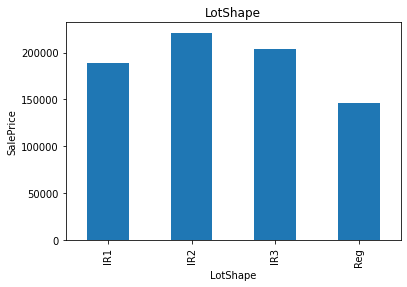

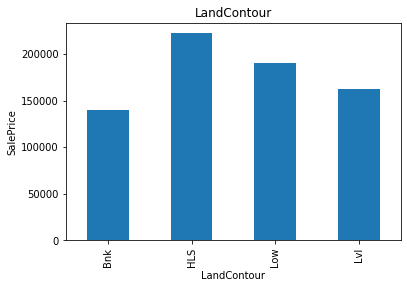

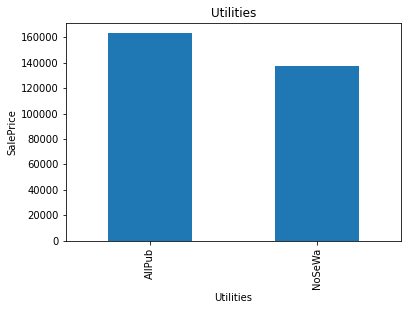

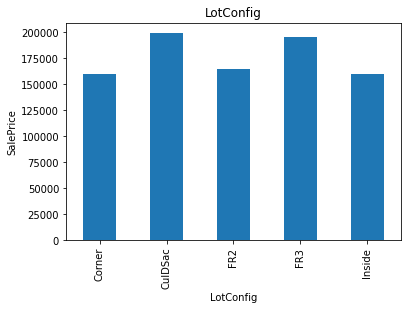

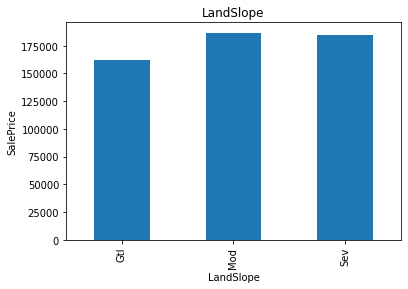

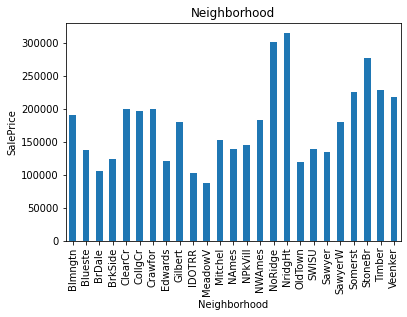

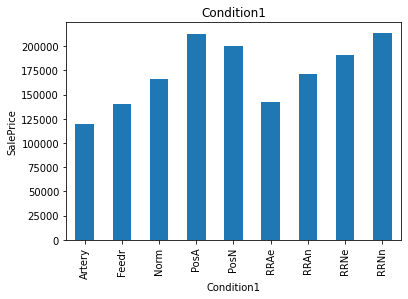

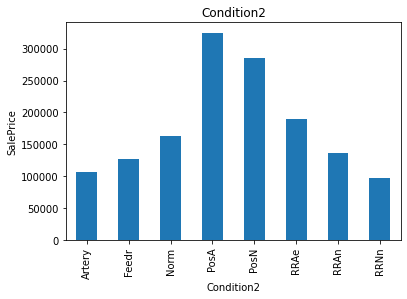

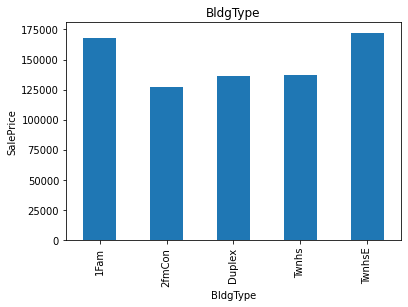

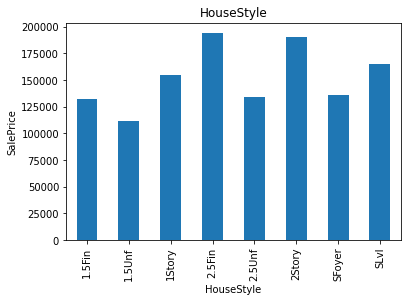

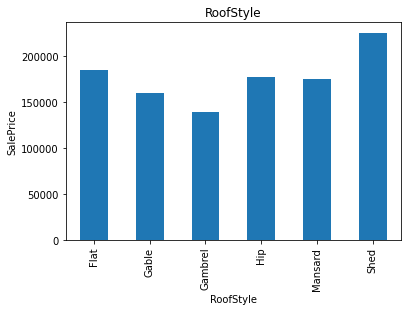

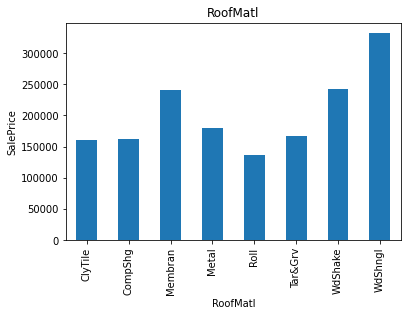

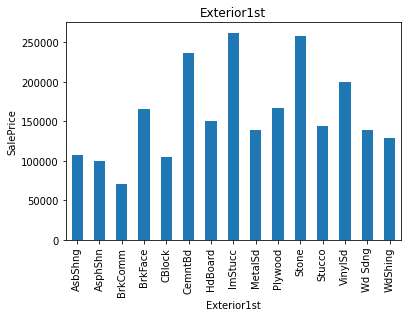

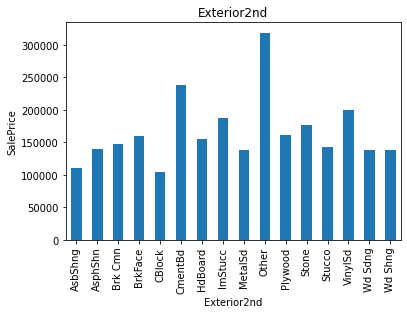

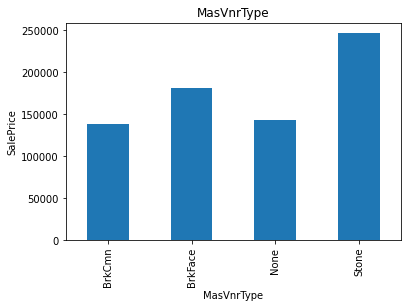

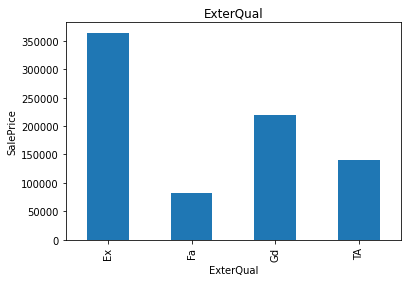

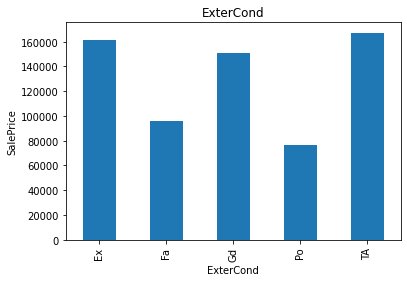

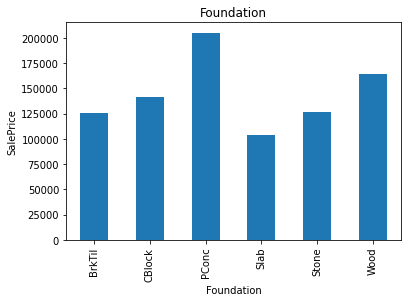

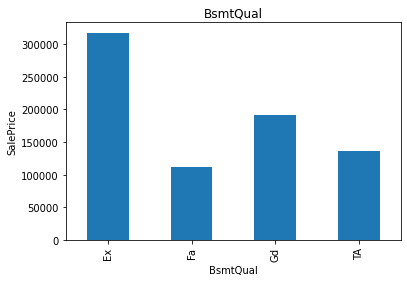

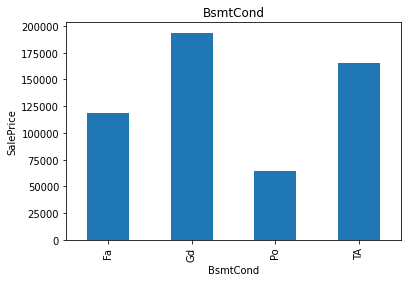

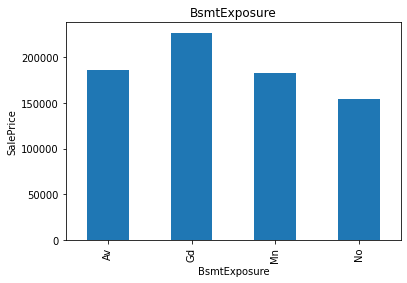

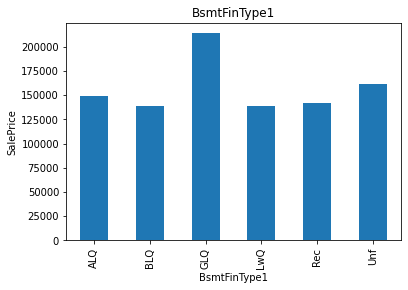

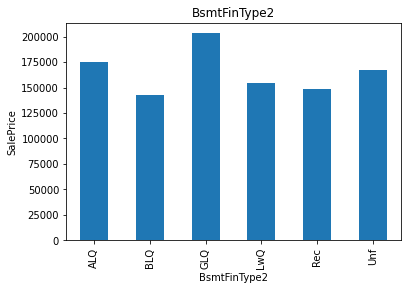

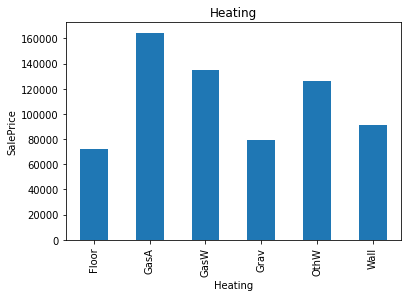

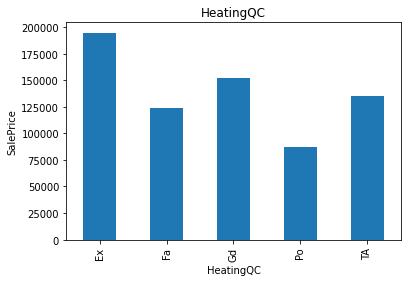

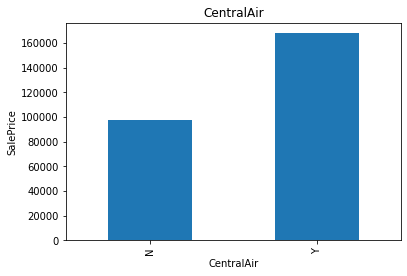

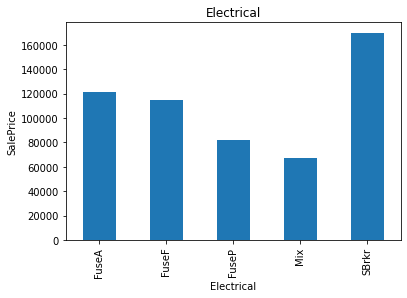

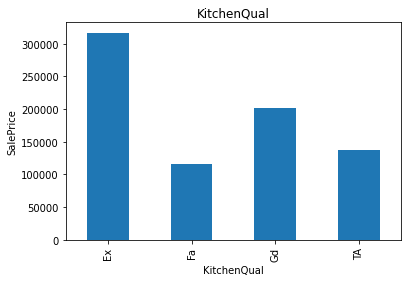

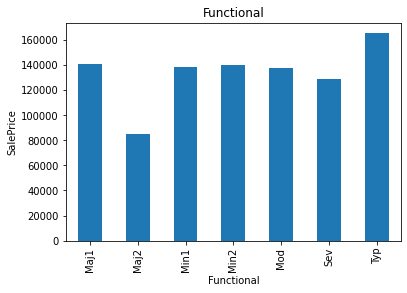

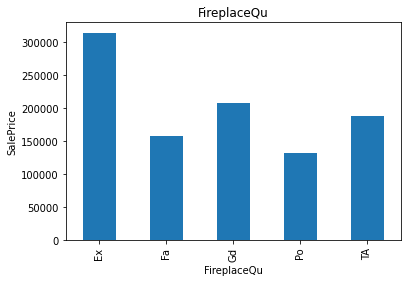

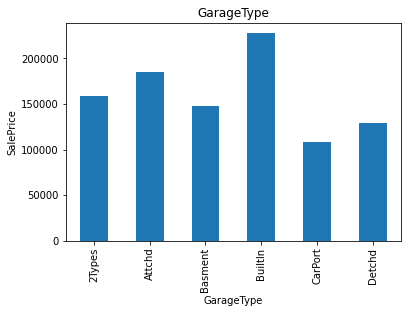

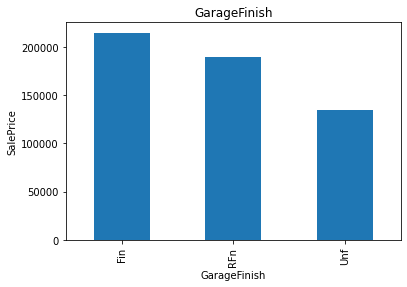

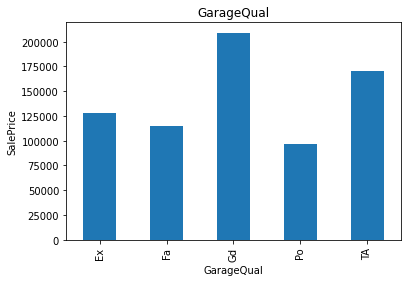

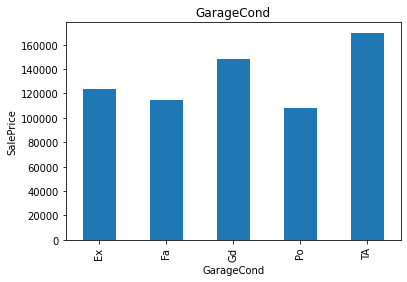

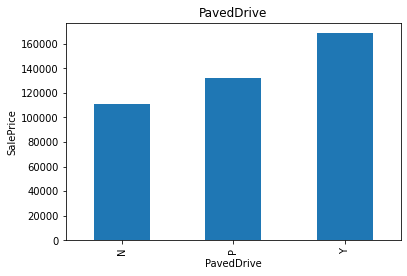

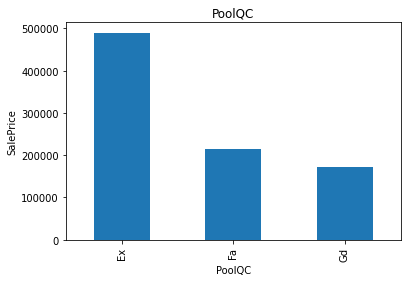

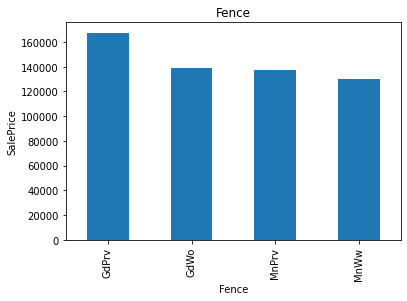

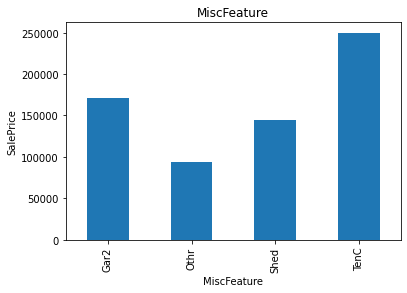

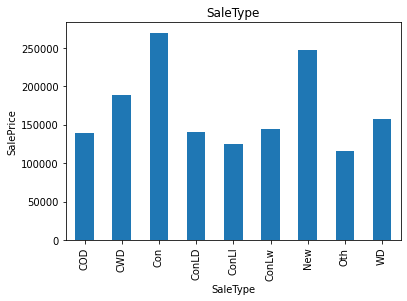

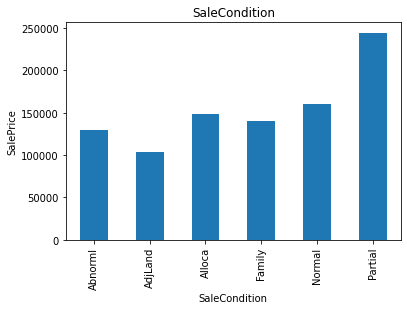

In [14]:
############### Categorical Features ################################
for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

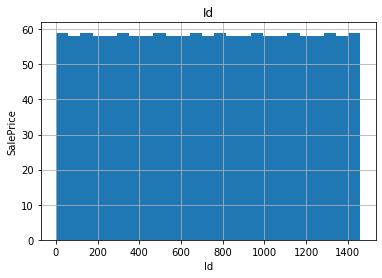

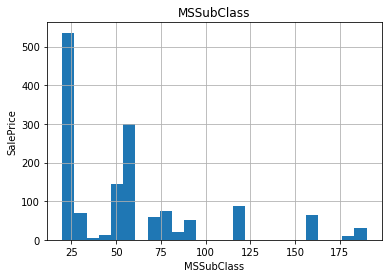

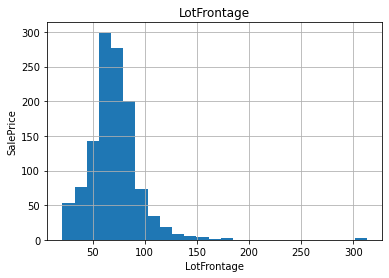

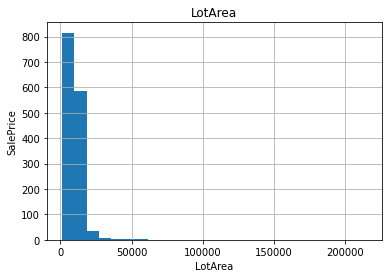

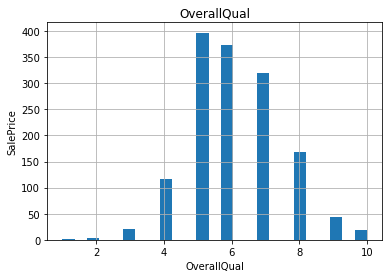

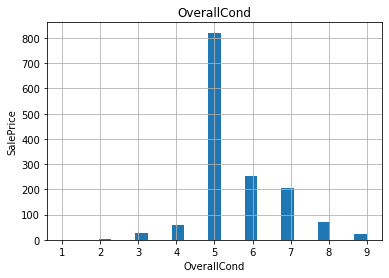

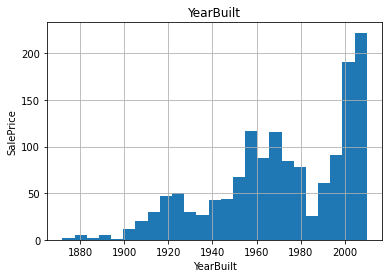

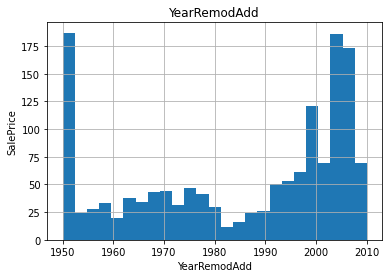

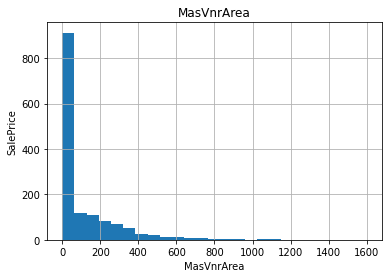

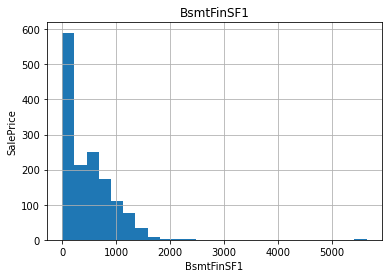

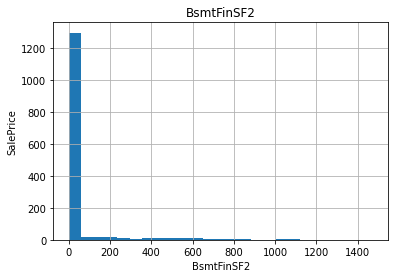

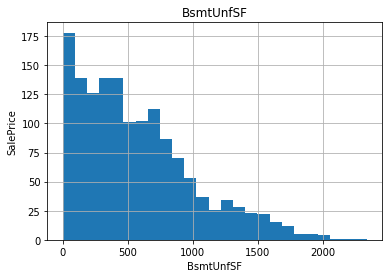

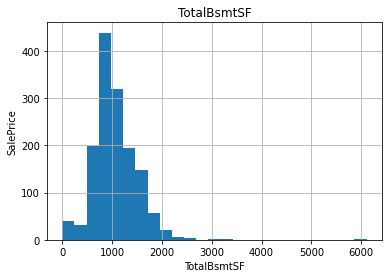

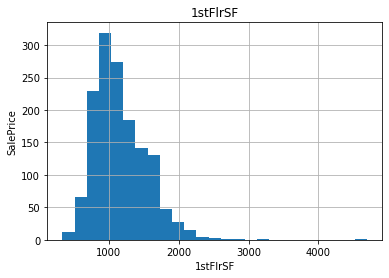

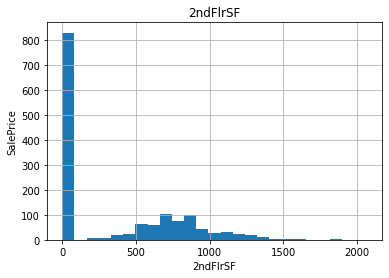

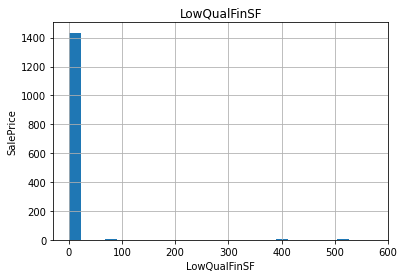

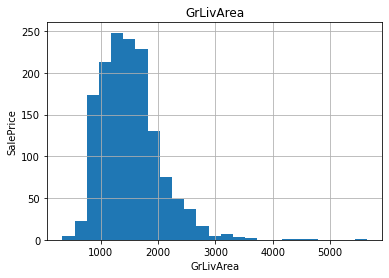

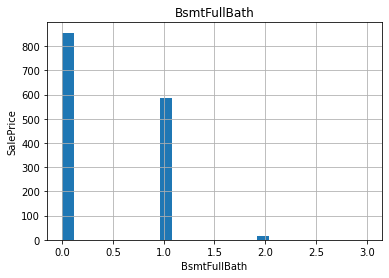

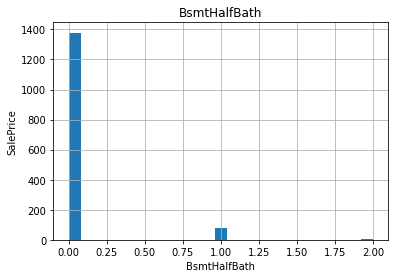

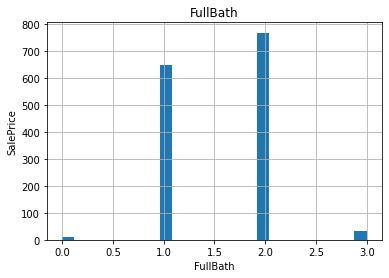

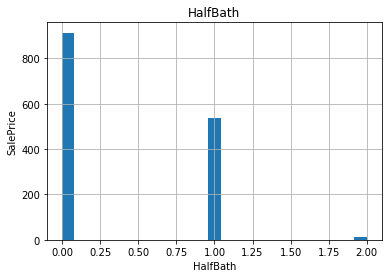

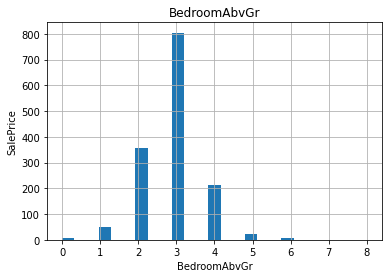

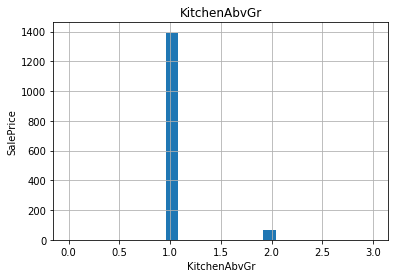

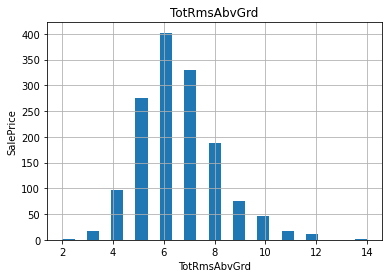

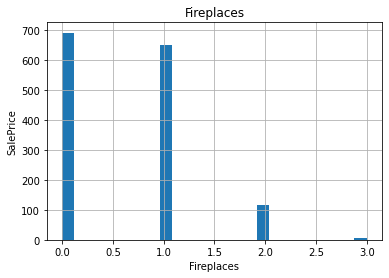

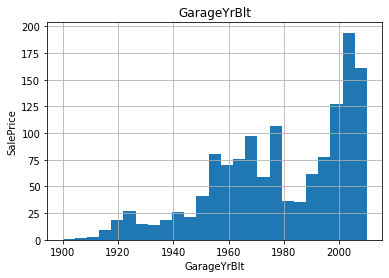

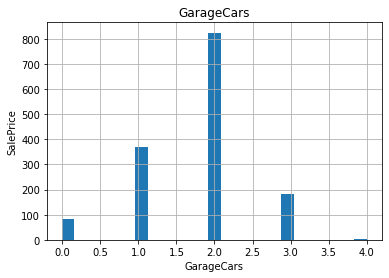

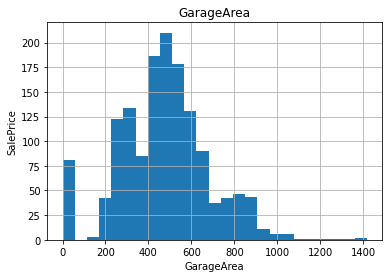

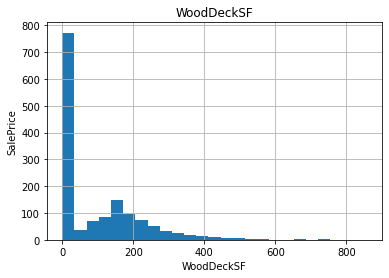

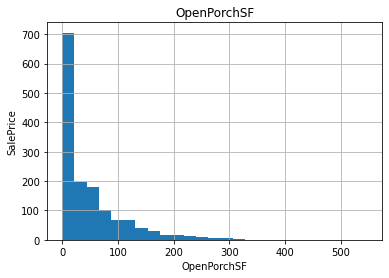

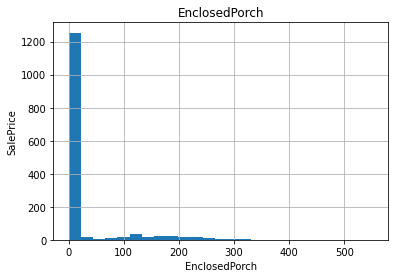

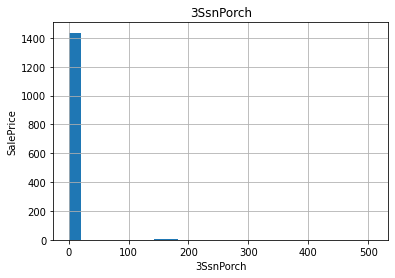

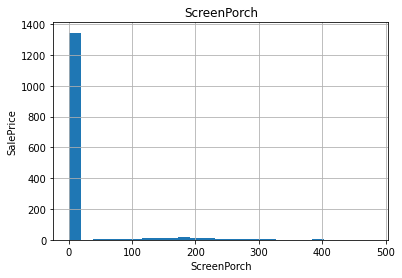

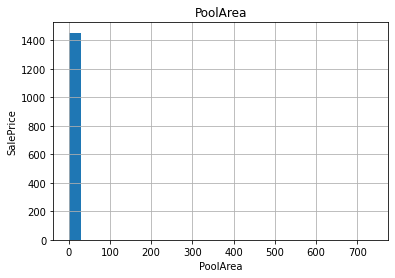

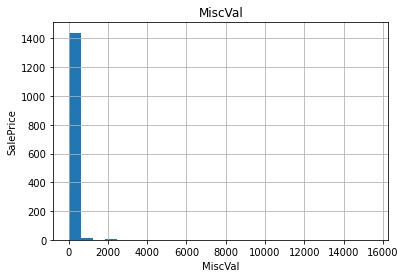

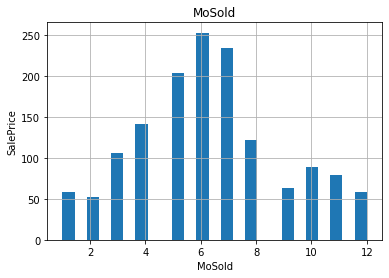

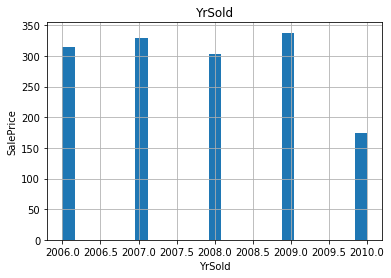

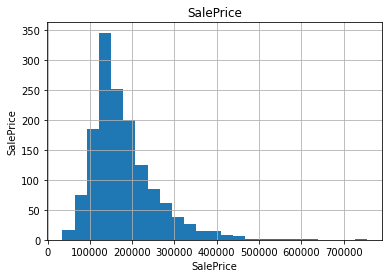

In [15]:
############### Numerical Features ################################
for feature in numerical_features:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [16]:
############NOW we need to separate discrete variables and confinuous valriables from numerical variables
########## there are categories in numerical features.

In [20]:
discrete_features = [ i for i in numerical_features if len(train_data[i].unique()) < 25 and  i not in Yr_features+['Id']]

In [21]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [22]:
len(discrete_features)

17

In [23]:
continuos_features = [ i for i in numerical_features if i not in discrete_features and i not in Yr_features+['Id'] ]

In [24]:
continuos_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [25]:
len(continuos_features)

16

In [27]:
17+16+4+1 ########### 17 -discrete, 16 continuos , 4 - year columns,1 - ID features #####################3

38

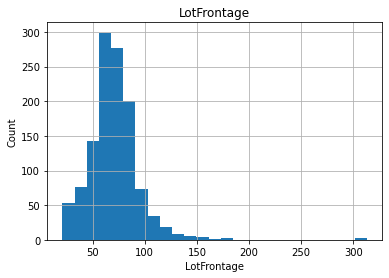

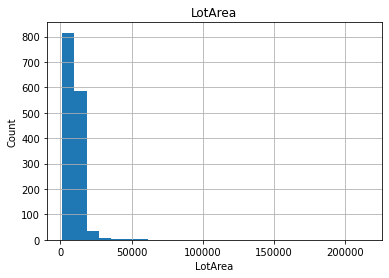

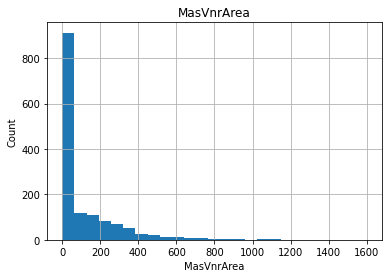

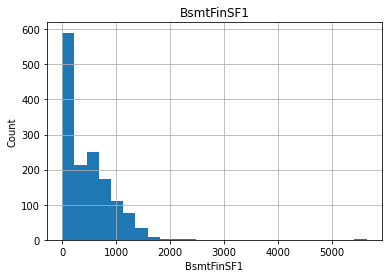

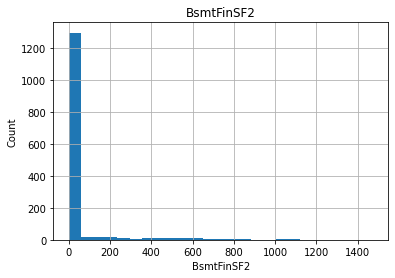

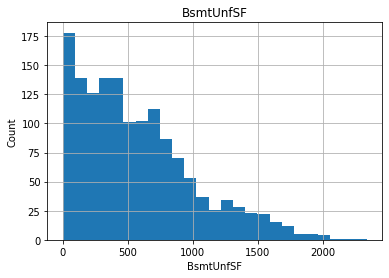

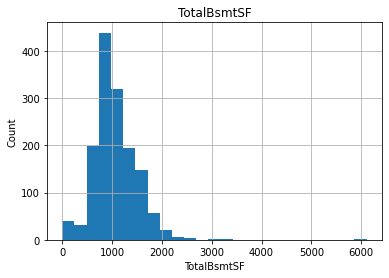

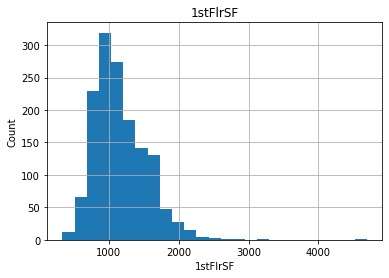

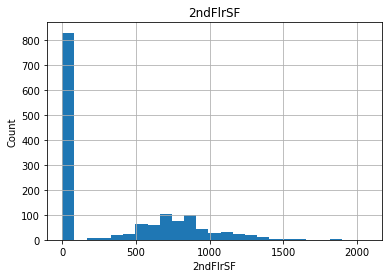

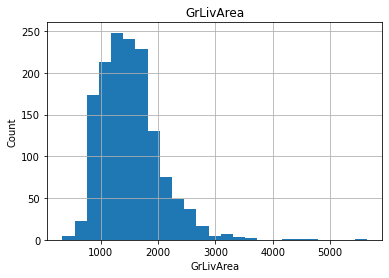

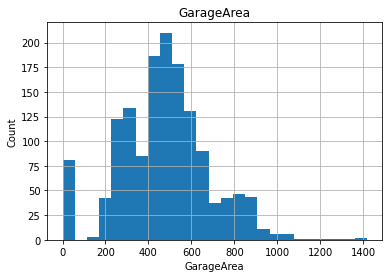

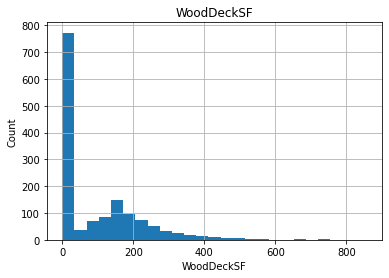

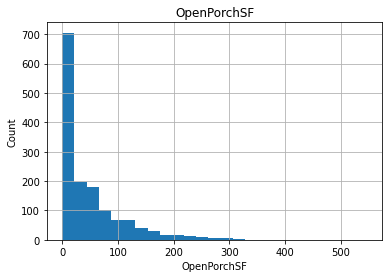

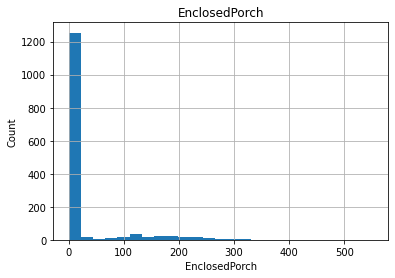

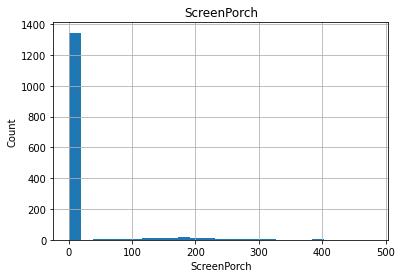

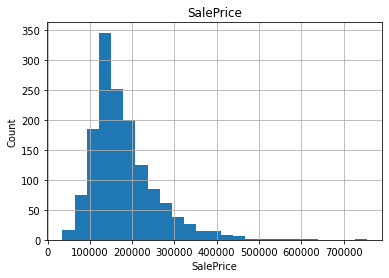

In [28]:
############### Continuos Features ################################
for feature in continuos_features:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [30]:
################NOTE: all continous variables are left skewed

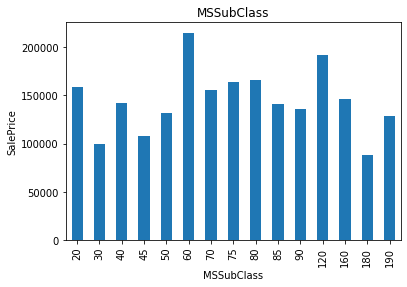

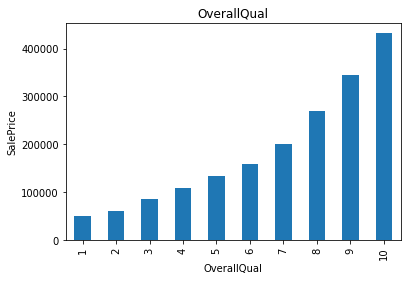

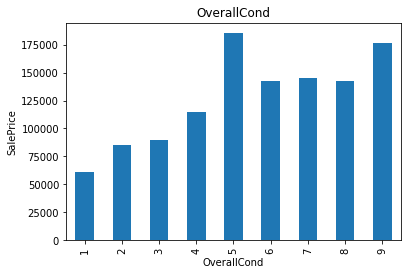

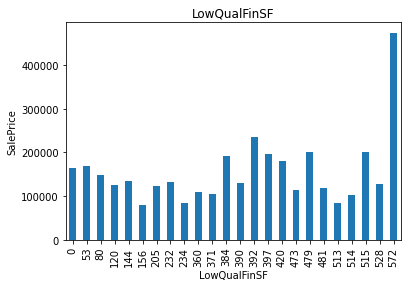

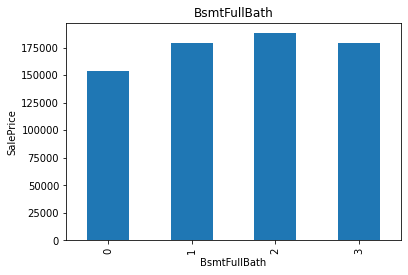

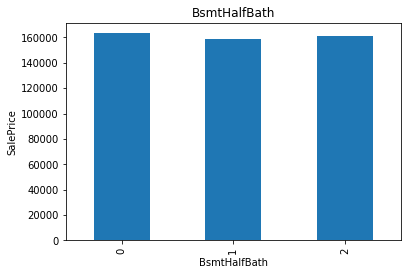

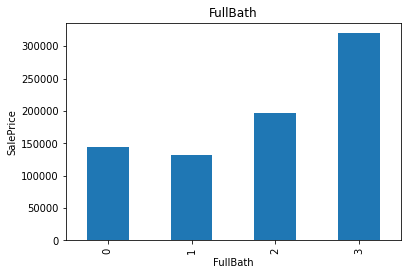

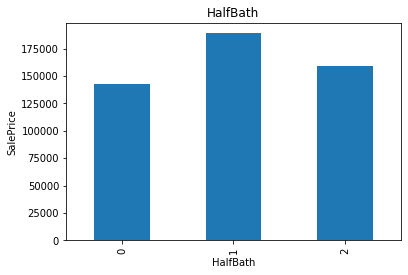

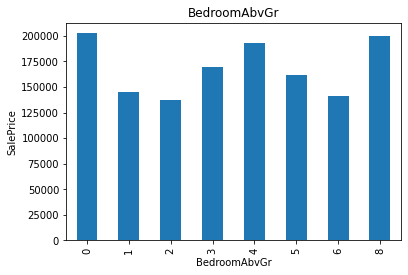

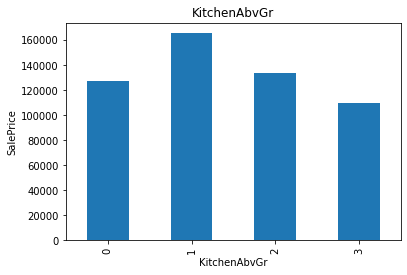

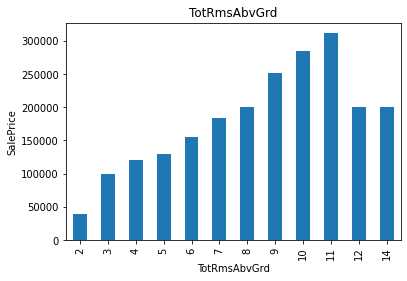

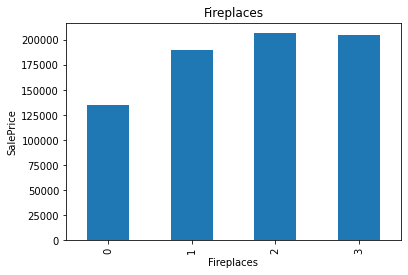

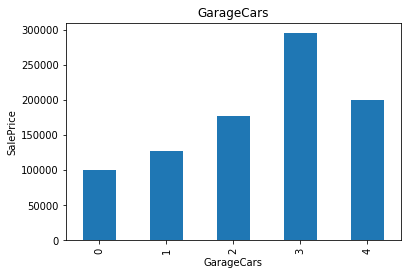

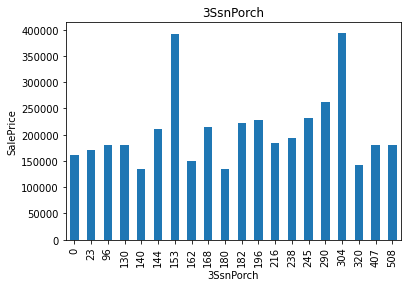

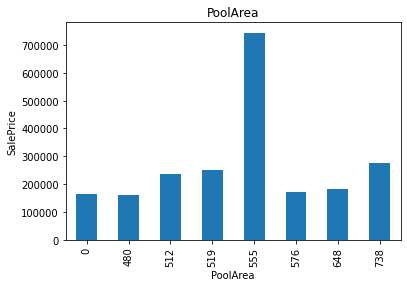

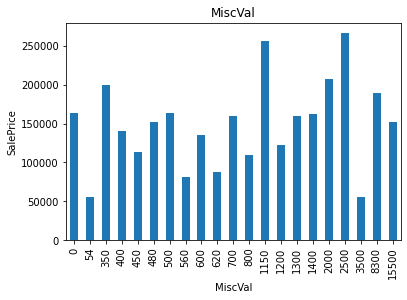

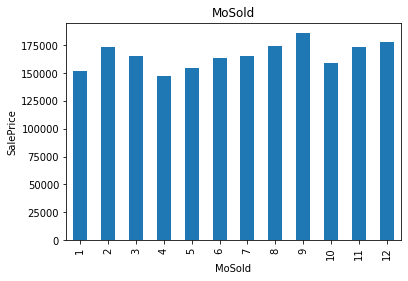

In [32]:
for feature in discrete_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

############### ANALYSIS ##################

1.Need to handle missing values --- imputation

2.left skewed columns in continuos variables. ---- log transformation.
